<a href="https://colab.research.google.com/github/MeeraVenugopal/CognoRise-Infotech/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION**

Predict whether a person has diabetes or not using features like glucose levels and BMI.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df['diabetes'].value_counts()


diabetes
0    91500
1     8500
Name: count, dtype: int64

Visualization of columns

<Axes: xlabel='gender', ylabel='count'>

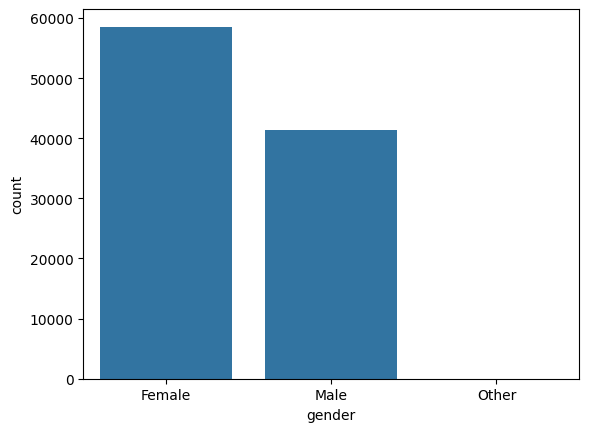

In [ ]:
sns.countplot(x='gender',data=df)

<Axes: xlabel='hypertension', ylabel='count'>

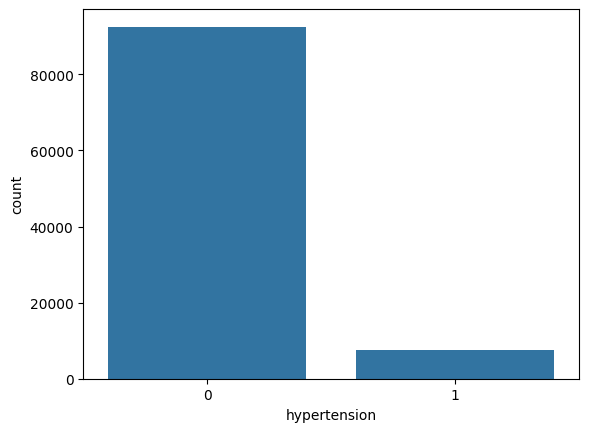

In [ ]:
sns.countplot(x='hypertension',data=df)

<Axes: xlabel='heart_disease', ylabel='count'>

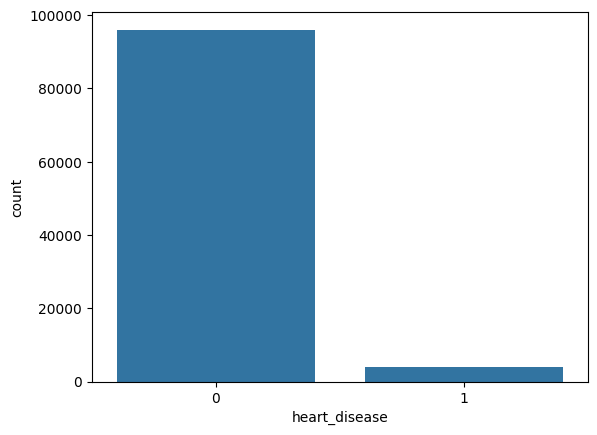

In [ ]:
sns.countplot(x='heart_disease',data=df)

<Axes: xlabel='smoking_history', ylabel='count'>

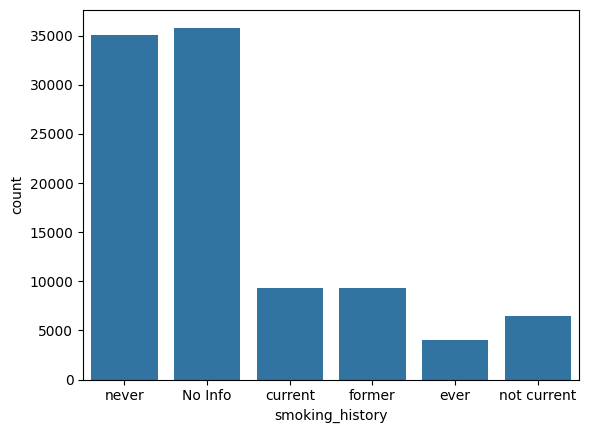

In [ ]:
sns.countplot(x='smoking_history',data=df)

<Axes: xlabel='HbA1c_level', ylabel='count'>

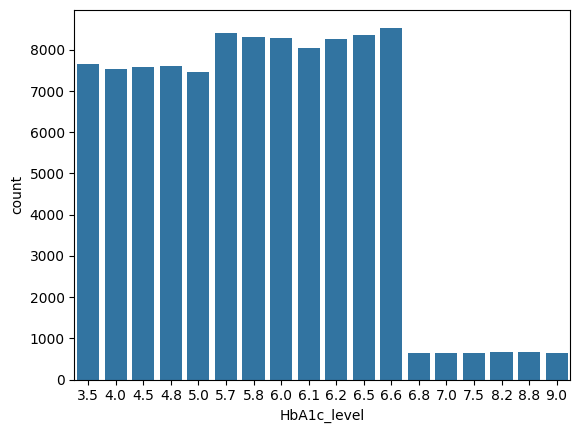

In [ ]:
sns.countplot(x='HbA1c_level',data=df)

<Axes: xlabel='blood_glucose_level', ylabel='count'>

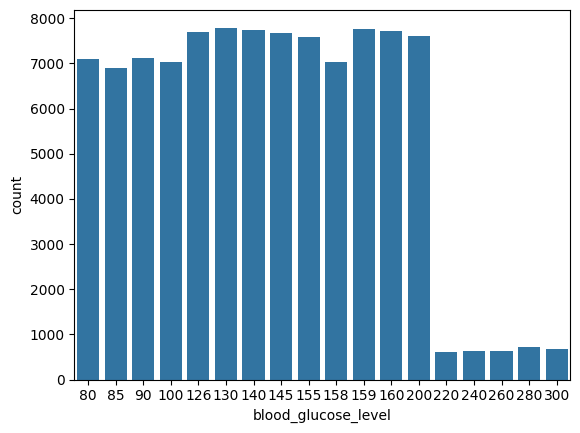

In [ ]:
sns.countplot(x='blood_glucose_level',data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for colomn in df.select_dtypes(include='object'):
  df[colomn]=lb.fit_transform(df[colomn])

In [ ]:
df.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.077919,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,0.228608,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,0.093177,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,0.027598,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.077919,0.228608,0.093177,0.027598,1.000000,0.179361,0.037369,0.040219,0.094290
bmi,-0.022994,0.337396,0.147666,0.061198,0.179361,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.037369,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.040219,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,0.094290,0.214357,0.400660,0.419558,1.000000


<Axes: >

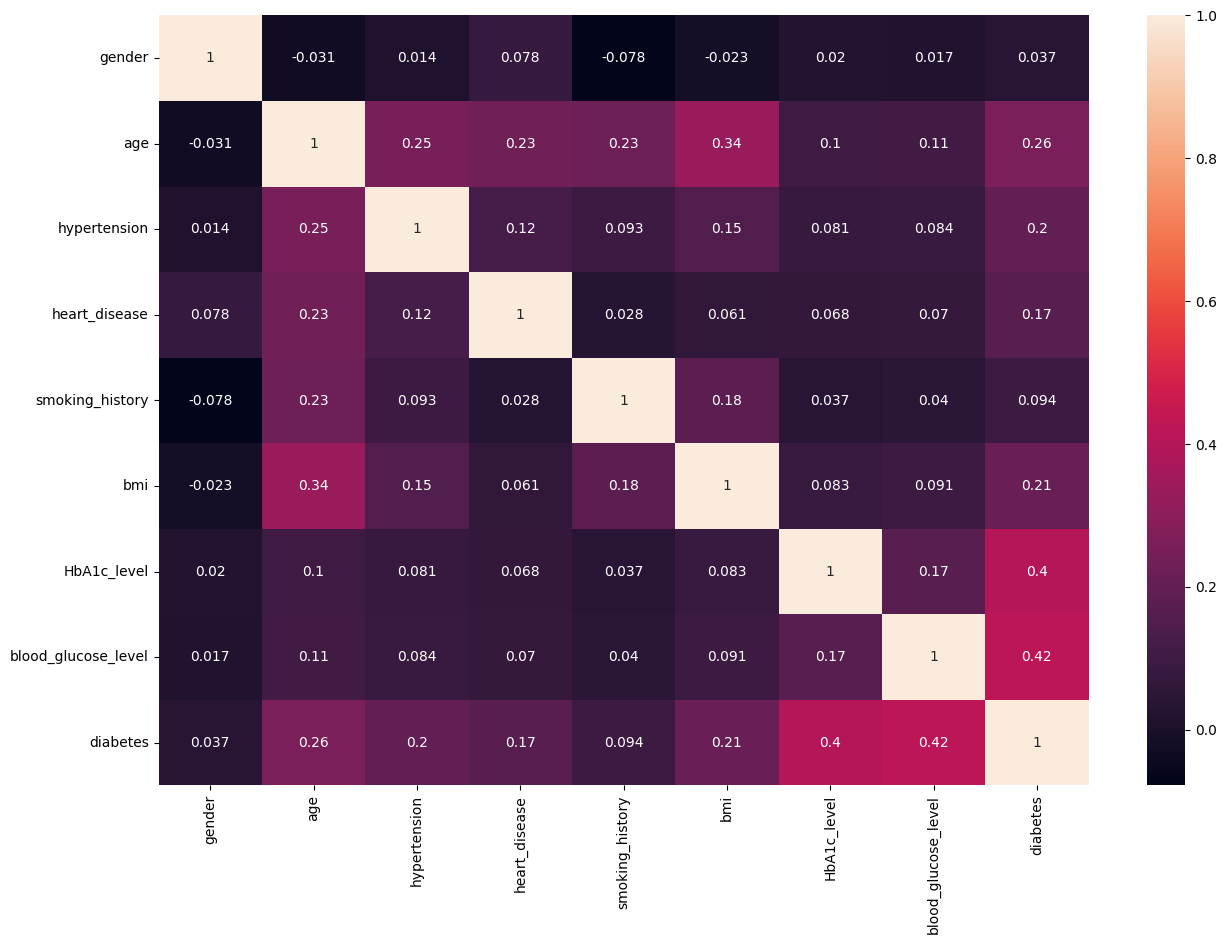

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
x

array([[  0.  ,  80.  ,   0.  , ...,  25.19,   6.6 , 140.  ],
       [  0.  ,  54.  ,   0.  , ...,  27.32,   6.6 ,  80.  ],
       [  1.  ,  28.  ,   0.  , ...,  27.32,   5.7 , 158.  ],
       ...,
       [  1.  ,  66.  ,   0.  , ...,  27.83,   5.7 , 155.  ],
       [  0.  ,  24.  ,   0.  , ...,  35.42,   4.  , 100.  ],
       [  0.  ,  57.  ,   0.  , ...,  22.43,   6.6 ,  90.  ]])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  1.  ,  49.  ,   0.  , ...,  27.32,   5.  , 155.  ],
       [  1.  ,  64.  ,   0.  , ...,  27.32,   3.5 , 145.  ],
       [  0.  ,  24.  ,   0.  , ...,  27.32,   3.5 , 130.  ],
       ...,
       [  1.  ,  42.  ,   0.  , ...,  26.14,   5.8 ,  85.  ],
       [  0.  ,  37.  ,   0.  , ...,  24.96,   6.2 , 158.  ],
       [  0.  ,  23.  ,   0.  , ...,  27.99,   5.  , 159.  ]])

In [ ]:
x_test

array([[  0.  ,  13.  ,   0.  , ...,  20.82,   5.8 , 126.  ],
       [  0.  ,   3.  ,   0.  , ...,  21.  ,   5.  , 145.  ],
       [  1.  ,  63.  ,   0.  , ...,  25.32,   3.5 , 200.  ],
       ...,
       [  0.  ,  80.  ,   0.  , ...,  33.03,   6.6 , 100.  ],
       [  0.  ,  80.  ,   0.  , ...,  27.32,   6.2 , 200.  ],
       [  0.  ,  26.  ,   0.  , ...,  20.67,   3.5 , 100.  ]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 1.18442308e+00,  3.14317452e-01, -2.86590244e-01, ...,
        -6.19069482e-04, -4.92624842e-01,  4.14557732e-01],
       [ 1.18442308e+00,  9.81097510e-01, -2.86590244e-01, ...,
        -6.19069482e-04, -1.89423192e+00,  1.69109989e-01],
       [-8.42706885e-01, -7.96982644e-01, -2.86590244e-01, ...,
        -6.19069482e-04, -1.89423192e+00, -1.99061626e-01],
       ...,
       [ 1.18442308e+00,  3.15342515e-03, -2.86590244e-01, ...,
        -1.79350769e-01,  2.54898933e-01, -1.30357647e+00],
       [-8.42706885e-01, -2.19106594e-01, -2.86590244e-01, ...,
        -3.58082468e-01,  6.28660821e-01,  4.88192055e-01],
       [-8.42706885e-01, -8.41434648e-01, -2.86590244e-01, ...,
         1.00864183e-01, -4.92624842e-01,  5.12736829e-01]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
knn=KNeighborsClassifier()
classifier=RandomForestClassifier(n_estimators=17,criterion='log_loss',random_state=0,max_features='sqrt')
model=DecisionTreeClassifier()
lst=[model,classifier,knn]

In [ ]:
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('Model is',i)
  print(y_pred)
  print('-'*100)
  print('The accuracy score of',i,'is',accuracy_score(y_test,y_pred))
  print('-'*100)
  print(confusion_matrix(y_test,y_pred),'is the confusion matrix of',i)
  print('-'*100)
  print(classification_report(y_test,y_pred),'is the classification report of',i)
  print('*'*100)

Model is DecisionTreeClassifier()
[0 0 0 ... 0 1 0]
----------------------------------------------------------------------------------------------------
The accuracy score of DecisionTreeClassifier() is 0.9538666666666666
----------------------------------------------------------------------------------------------------
[[26740   713]
 [  671  1876]] is the confusion matrix of DecisionTreeClassifier()
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27453
           1       0.72      0.74      0.73      2547

    accuracy                           0.95     30000
   macro avg       0.85      0.86      0.85     30000
weighted avg       0.95      0.95      0.95     30000
 is the classification report of DecisionTreeClassifier()
****************************************************************************************************
Model is